# Intro to Neural Networks


In [1]:
import numpy as np
from matplotlib import pyplot as plt

<img src="img/move_on.jpg" width=400>

### Remember when we went from linear to logistic regression?

<img src="img/linear_vs_logistic_regression.jpg" width=650>

### Use a linear combination of variables

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2, x_2 +\ldots + \beta_n x_n $$

### And passed the sum product of those variables and coefficients through a sigmoid function.

$$ P(y) = \displaystyle \frac{1}{1+e^{-(\hat y)}}$$

![sig](img/SigmoidFunction_701.gif)

### Another way of writing this:

<img src="img/log_reg_deriv.png" width=500>

### If we change the orientation of the first part, we get a new diagram:
<img src="img/log_reg.png" width=500>

### _Logistic Regression_ was our first introduction to a Neural Network(NN):
<img src="img/log_reg.png" width=500>

<img src="img/dogcat.gif" width=500>

### A more general notation for a single layer NN:
![fnn](img/First_network.jpg)

### New vocabulary!

- input layer
- weights
- hidden layer
- summation function
- activation function
- output

## Input layer

The input layer of a neural network is the list of variables we are using in our model.

<img src="img/log-reg-nn-ex-i.png" width=500>

## Weights

In the case of logistic regression, the weights here are the coefficients we are adjusting to fit our model. In other Neural Networks, the weights are a combination of scalar transformations and matrix multiplication on any of the input variables.

<img src="img/log-reg-nn-ex-w.png" width=500>

## Summation function

<img src="img/log-reg-nn-ex-sum.png" width=500>

## Activation function

In logistic regression we use a **sigmoid** activation function. Other options you might see are **linear**, **Tanh** and **ReLu**.<br>
[Loss functions for neural networks](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
<img src="img/log-reg-nn-ex-a.png" width=500>

## Deeper networks = more hidden layers

![dnn](img/Deeper_network.jpg)

## Why _hidden_ layers?

They are hidden because we do not specify them. They could represent latent factors (as with matrix decomposition), or a combination of the existing variables into new features.

![ic-nn](img/Ice_cream_network.jpg)

## But why _neural_ ?

![neuron-bio](img/neuron.png)

## Inspiration from Actual Neurons

"The signaling process is partly electrical and partly chemical. Neurons are electrically excitable, due to maintenance of voltage gradients across their membranes. If the voltage changes by a large enough amount over a short interval, the neuron generates an all-or-nothing electrochemical pulse called an action potential. This potential travels rapidly along the axon, and activates synaptic connections as it reaches them. Synaptic signals may be excitatory or inhibitory, increasing or reducing the net voltage that reaches the soma." (https://en.wikipedia.org/wiki/Neuron)

Another important idea from neurology is the "all-or-none" principle: <br/> (https://en.wikipedia.org/wiki/Neuron#All-or-none_principle)

### The biology comparison 

Neural networks draw their inspiration from the biology of our own brains, which are of course also accurately described as 'neural networks'. A human brain contains around $10^{11}$ neurons, connected very densely.

One of the distinctive features of a neuron is that it has a kind of activation potential: If the electric signal reaching a neuron is strong enough, the neuron will fire, sending electrical signals further along the network. Thus  there is a kind of input-output structure to neurons that the artificial networks will be mimicking.

[60's and 70's](https://towardsdatascience.com/the-differences-between-artificial-and-biological-neural-networks-a8b46db828b7)

## Important differences 

Having input, output, and bias: This should so far sound _**much**_ like _**linear regression**_.
Have the computer choose weights on the various input parameters so as to optimize the predictions on outputs.

But there are, of course, **important** differences, how the model trains on the data and how it adjusts for error.

## Model Training - batches

![toomuch](img/much-data-too-much-data.jpg)

Unlike other models that can take all the data in the trianing set, Neural nets generally don't accept the entire dataset all at once. Thus we often want to specify a *batch size*, which will break our data up into chunks of that size.

Example: $ 1,000$ data points, _batch size_ **500**

## Model Training - epochs
![epock](img/2014-10-28_anthropocene.png)

When all four batches of 500 observations go through the NN, one **epoch** is completed. 


Generally speaking, one epoch is NOT enough to see significant error reduction. But, because of the power of gradient descent, there are often very significant strides  made after a few tens or hundreds of epochs.

## Back propagation - adjusting weights
Moreover, neural nets are dynamic in the sense that, after a certain number of data points have been passed through the model, the weights will be *updated* with an eye toward optimizing our loss function. (Thinking back to biological neurons, this is like revising their activation potentials.) Typically, this is  done  by using some version of gradient descent, but [other approaches have been attempted](https://arxiv.org/abs/1605.02026).

![bprop](img/BackProp_web.png)

## Back propagation - visualized

![bb](img/ff-bb.gif)

## Details of Back Propagation
One of the most popular optimizers these days is called 'Adam', which generalizes from ordinary gradient descent by having individual and dynamic learning rates. [This article](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) has a nice discussion of Adam.

For the mathematical details, check out [this post](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/).

Given that we are only passing *some* data points through at any one time, the question of *when* to update the weights becomes pressing. Standardly, we'd wait until we've passed all the data through before updating, but we might try updating after each batch ("batch gradient descent") or even after each point ("stochastic gradient descent"). [This post](https://datascience.stackexchange.com/questions/27421/when-are-weights-updated-in-cnn) has more details.

## Who Cares?

Remember graph theory? [Neural networks are much like computational graphs](https://medium.com/tebs-lab/deep-neural-networks-as-computational-graphs-867fcaa56c9). (This is why Tensorflow is useful for constructing neural networks! More on this tomorrow.)

And computational graphs can be used [to approximate *any* function](http://neuralnetworksanddeeplearning.com/chap4.html).

## Activation Functions

Some common activation functions:

**binary step**: $f(x) = 0$ if $x\leq 0$; $f(x) = 1$ otherwise

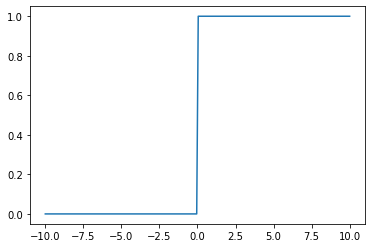

In [2]:
# Coding binary step:

X = np.linspace(-10, 10, 200)
y_bs = list(np.zeros(100))
y_bs.extend(list(np.ones(100)))

plt.plot(X, y_bs);

**ReLU**: $f(x) = 0$ if $x\leq 0$; $f(x) = x$ otherwise

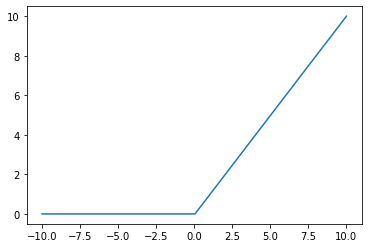

In [3]:
# Coding ReLU:

y_relu = list(np.zeros(100))
y_relu.extend(np.linspace(0, 10, 100))

plt.plot(X, y_relu);

**Sigmoid**: $f(x) = \frac{1}{1 + e^{-x}}$

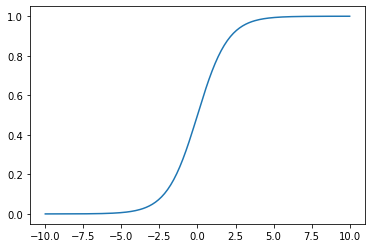

In [4]:
# Coding Sigmoid:

y_sig = 1 / (1 + np.exp(-X))

plt.plot(X, y_sig);

**tanh**: $f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

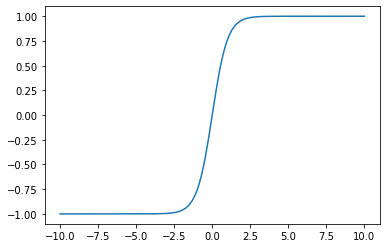

In [5]:
# Coding tanh:

y_tanh = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

plt.plot(X, y_tanh);

**Softsign**: $f(x) = \frac{x}{1 + |x|}$

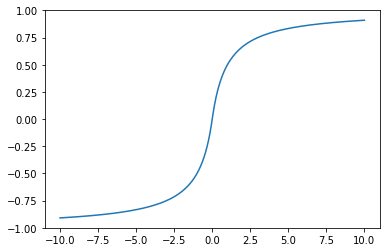

In [6]:
# Coding Softsign:

y_ss = X / (1 + np.abs(X))

plt.plot(X, y_ss);

Notice that ReLU ("Rectified Linear Unit") increases without bound as $x\rightarrow\infty$. The advantages and drawbacks of this are discussed on [this page on stackexchange](https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks)

## GUI!

[Tinker with a neural network online](https://playground.tensorflow.org)

<h1 style="color:brown;">  Hands on practice with neural network</h1> 

## Types of Neural Networks
- Perceptron / Auto-encoder - today

the hidden layer is an encoding of the generalization
- Convolutional neural networks - Tuesday
- Recurrent neural network - Tuesday

<img src="https://www.compthree.com/images/blog/ae/ae.png" width=450>

![](./img/CNN.png)

![](./img/RNN.png)

### Tensorflow and Keras

### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](./img/keras_2.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

## Wait, what's TensorFlow?


## Let's start with tensors

## Tensors are multidimensional matricies

![tensor](./img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](./img/cat-tensors.gif)

### Building our first Neural Network - Auto-encoder

#### Install Keras & tensorflow

In [8]:
pip install tensorflow

     |████████████████████████████████| 175.3 MB 26 kB/s s eta 0:00:01
     |████████████████████████████████| 3.0 MB 57.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 67.4 MB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
     |████████████████████████████████| 42 kB 4.8 MB/s  eta 0:00:01
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached absl-py-0.9.0.tar.gz (104 kB)
     |████████████████████████████████| 454 kB 45.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 91 kB 25.5 MB/s eta 0:00:01
  Using cached Markdown-3.2.2-py3-none-any.whl (88 kB)
     |████████████████████████████████| 779 kB 32.9 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 45.5 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 7

### Keras basic syntax 

<a href="https://keras.io">Documentation</a>

In [98]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [99]:
x_train = np.random.random((1000,20))
x_train

array([[0.70036899, 0.41791692, 0.44018583, ..., 0.61361667, 0.77357554,
        0.11964087],
       [0.86030843, 0.21651137, 0.87898912, ..., 0.70028093, 0.47754029,
        0.08407185],
       [0.54170041, 0.21839589, 0.30640917, ..., 0.67701133, 0.93811627,
        0.91549821],
       ...,
       [0.85223063, 0.15662798, 0.26208629, ..., 0.09572836, 0.51217393,
        0.87726284],
       [0.64731478, 0.58451645, 0.1569726 , ..., 0.02899358, 0.9942004 ,
        0.29130092],
       [0.27898279, 0.55520402, 0.15833808, ..., 0.22582106, 0.09075997,
        0.98337452]])

In [100]:
x_train.shape

(1000, 20)

In [101]:
x_test = np.random.random((1000, 20))

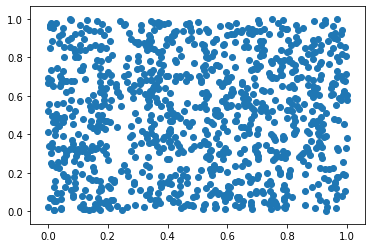

In [102]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0], x_train[:,5])

In [103]:
y_train = np.random.randint(10, size=(1000))

In [104]:
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
y_test = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)

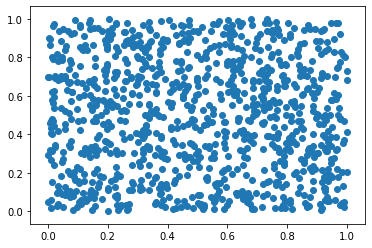

In [105]:
plt.scatter(x_train[:, 9], x_train[:, 5])

In [106]:
# initialize the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
model = Sequential()

In [107]:
# Adding layers --> simple as .add()
# Dense means fully-connected layer + activation
model.add(Dense(units=64, activation='relu', input_shape = x_train[0].shape))
model.add(Dense(units=10, activation='softmax')) # softmax for multiple classification

In [108]:
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['mae', 'acc']) # mean absolute errors


In [109]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 1,994
Trainable params: 1,994
Non-trainable params: 0
_________________________________________________________________


<a href="https://keras.io/optimizers/">more optimizers</a>

In [110]:
# Training the model!

history = model.fit(x_train, y_train,
                    batch_size=128, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0907 - mae: 0.1801 - acc: 0.0950 - val_loss: 0.0906 - val_mae: 0.1801 - val_acc: 0.0840
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 0.0903 - mae: 0.1799 - acc: 0.0930 - val_loss: 0.0905 - val_mae: 0.1802 - val_acc: 0.0900
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 0.0901 - mae: 0.1798 - acc: 0.1050 - val_loss: 0.0905 - val_mae: 0.1802 - val_acc: 0.0880
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 0.0900 - mae: 0.1797 - acc: 0.1180 - val_loss: 0.0905 - val_mae: 0.1803 - val_acc: 0.0820
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - mae: 0.1796 - acc: 0.1210 - val_loss: 0.0905 - val_mae: 0.1803 - val_acc: 0.0830
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0898 - mae: 0.1796 - acc: 0.1250 - val_loss: 0.0905 - val_mae: 0.1803 - val_acc: 0.0890
Epoch 7/20
8/8 [=======================

In [111]:
# Results of the model over epochs
history.history['val_loss']

[0.09057731926441193,
 0.09053386002779007,
 0.09048821777105331,
 0.09049485623836517,
 0.09051573276519775,
 0.09050599485635757,
 0.09049201756715775,
 0.0905020460486412,
 0.0905076265335083,
 0.0905166044831276,
 0.09051176905632019,
 0.09054434299468994,
 0.0905451849102974,
 0.09056800603866577,
 0.09056365489959717,
 0.09056831151247025,
 0.09059055149555206,
 0.0905783548951149,
 0.09062325209379196,
 0.0906028002500534]

In [112]:
history.history['loss']

[0.09071901440620422,
 0.09031642973423004,
 0.09008730947971344,
 0.08997920155525208,
 0.08988342434167862,
 0.08982090651988983,
 0.08975059539079666,
 0.08969105780124664,
 0.08963297307491302,
 0.08957734704017639,
 0.0895211398601532,
 0.08946999907493591,
 0.08941569179296494,
 0.08935979008674622,
 0.08929963409900665,
 0.08924310654401779,
 0.0891847163438797,
 0.08913571387529373,
 0.08909853547811508,
 0.08902579545974731]

In [113]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 1,994
Trainable params: 1,994
Non-trainable params: 0
_________________________________________________________________


In [114]:
## Evaluate
loss_and_metrics = model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 809us/step - loss: 0.0906 - mae: 0.1803 - acc: 0.0980


In [115]:
loss_and_metrics

[0.09060279279947281, 0.18027862906455994, 0.09799999743700027]

In [64]:
### Useful
model.save('./model.h5') # Save your weights and computational graph
from keras.models import load_model
load_model('./model.h5') # loading the saved model from above

ModuleNotFoundError: No module named 'keras'

In [ ]:
model.summary()

### Your exercise:  Image reconstruction using auto-encoder

##### Import dataset - Mnist (handwritten digits)

In [ ]:
import matplotlib.pyplot as plt

In [65]:
# keras imports for the dataset and building our neural network
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
# a. Load the Mnist dataset and split to train/test 
#                                        (use mnist.load_data())
# b. Plot few images with their label
# c. reshape images to 784 dim vector and normalize (divide by 255)
# d. Create a new model with 1 Dense layers sized 32
#                                     (encoder) with relu activation.
#    Then add a dense layer sized 784 with sigmoid activation.
#    Run it for 50 epochs with batches of 256. Use binary cross-entropy.
# e. Plot the model loss
# f. Use predict to encode and decode x_test

In [67]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

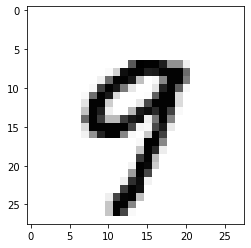

In [68]:
plt.imshow(x_train[45], cmap = 'Greys')

In [69]:
y_train[45]

9

In [70]:
x_train[0].shape

(28, 28)

In [71]:
# c. reshape images to 784 dim vector and normalize (divide by 255)

x_train = x_train / 255.
x_test = x_test / 255.

In [72]:
x_train.shape

(60000, 28, 28)

In [73]:
# d. Create a new model with 1 Dense layers sized 32
#                                     (encoder) with relu activation.

from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape = x_train[0].shape))
model.add(Dense(32, activation = 'relu'))

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [75]:
#    Then add a dense layer sized 10 with softmax activation.
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [76]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [77]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [78]:
#    Run it for 50 epochs with batches of 256. Use binary cross-entropy.
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['mae', 'acc']) # mean absolute errors


In [79]:
#trainin the model

history = model.fit(x_train, y_train,
                    batch_size=256, epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1020 - mae: 0.0665 - acc: 0.8234 - val_loss: 0.0496 - val_mae: 0.0315 - val_acc: 0.9200
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0454 - mae: 0.0279 - acc: 0.9255 - val_loss: 0.0383 - val_mae: 0.0233 - val_acc: 0.9372
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0373 - mae: 0.0224 - acc: 0.9382 - val_loss: 0.0341 - val_mae: 0.0200 - val_acc: 0.9445
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0329 - mae: 0.0195 - acc: 0.9460 - val_loss: 0.0310 - val_mae: 0.0180 - val_acc: 0.9478
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0297 - mae: 0.0175 - acc: 0.9515 - val_loss: 0.0290 - val_mae: 0.0166 - val_acc: 0.9512
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0271 - mae: 0.0159 - acc: 0.9558 - val_loss: 0.0278 - val_mae: 0.0156 - val_acc: 0.9526
Epoch 7/50
235/2

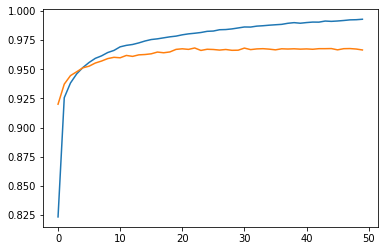

In [82]:
plt.plot(range(50),history.history['acc'])
plt.plot(range(50),history.history['val_acc'])

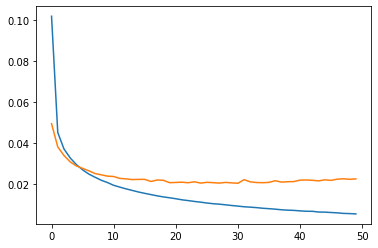

In [83]:
plt.plot(range(50),history.history['loss'])
plt.plot(range(50),history.history['val_loss'])

In [85]:
model.predict(x_test[600:601])

array([[1.7550557e-08, 1.3267535e-07, 4.5065068e-08, 5.5271747e-09,
        4.7805734e-08, 8.4980962e-07, 9.9999893e-01, 6.3356824e-12,
        1.3807551e-08, 5.3247146e-10]], dtype=float32)

In [86]:
y_test[600]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)